# DSP QA Engineer Application

## Image Processing



Turn the volume down to half. \
Execute the cells from top to bottom.

In [14]:
import cv2  # opencv 
import numpy as np
import scipy.io.wavfile
import matplotlib.pyplot as plt
from IPython.display import Image, Audio, display
from IPython.core.interactiveshell import InteractiveShell

import ipytest
ipytest.autoconfig()

# cell output config
InteractiveShell.ast_node_interactivity = "all"

# setup blob detector from opencv 
params = cv2.SimpleBlobDetector_Params()

# set area filtering parameters
params.filterByArea = True
params.minArea = 100
  
# set circularity filtering parameters
params.filterByCircularity = True 
params.minCircularity = 0.66
  
# set convexity filtering parameters
params.filterByConvexity = True
params.minConvexity = 0.1
      
# set inertia filtering parameters
params.filterByInertia = True
params.minInertiaRatio = 0.01

# set up the detector with default parameters.
detector = cv2.SimpleBlobDetector_create(params)

def showImage(im):
    plt.axis('off')
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
    plt.show()

# counts shapes with the specified params
def countBlobs(im, detector=detector):
    
    # detect blobs in image
    keypoints = detector.detect(im)
    
    keypoints_arr = np.asarray(keypoints)
    
    blob_count = keypoints_arr.size

    # Draw red markers around the blobs.
    im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    
    return blob_count, im_with_keypoints

# gives the sample positon at second x   
def secToSamplePositon(fs, sec):
    return np.floor(np.multiply(fs,sec)).astype(int)

# simple audio effect
def stretchTime(wave):
    # stretches time by adding zeroes between samples
    return np.insert(wave, slice(1, None), 0)

# adjusts the volume
def adjustVolume(wave, factor=0.3):
    return np.multiply(wave, factor)

# normalizes the amplitude to values between 0.0 and 1.0
def normalize(audio):
    audio /= np.max(np.abs(audio),axis=0)
    return audio

In [8]:
fs, a = scipy.io.wavfile.read("Hal9000/BlobAttack.wav")

a = normalize(a)
a = adjustVolume(a)

Audio(a, rate=fs, normalize=False)

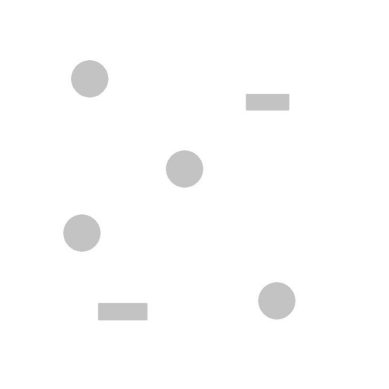

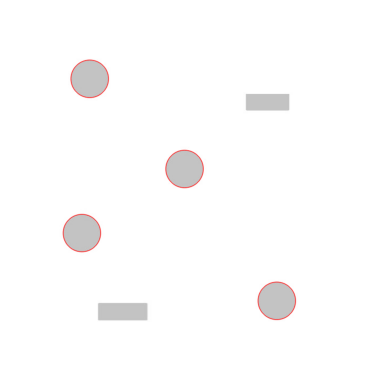

In [4]:
im = cv2.imread("Img/4Blobs.jpg", cv2.IMREAD_GRAYSCALE)

# input image
showImage(im)

blob_count, image_with_keypoints = countBlobs(im)

# output image with markers
showImage(image_with_keypoints)

In [4]:
%%ipytest -qq

def test_count_4_Blobs():
    assert blob_count == 4

.                                                                                            [100%]


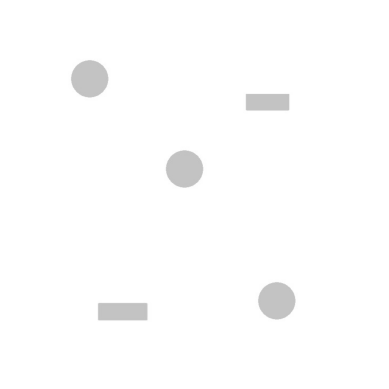

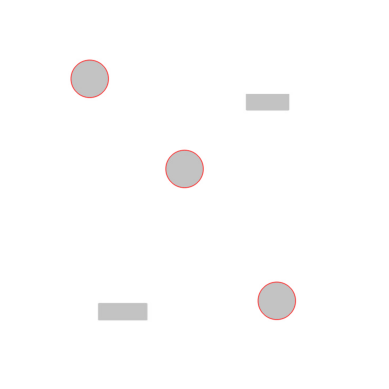

In [5]:
im = cv2.imread("Img/3Blobs.jpg", cv2.IMREAD_GRAYSCALE)

# input image
showImage(im)

blob_count, image_with_keypoints = countBlobs(im)

# output image with markers
showImage(image_with_keypoints)

In [6]:
%%ipytest -qq

def test_count_4_Blobs():
    assert blob_count == 4

F                                                                                            [100%]
============================================ FAILURES =============================================
_______________________________________ test_count_4_Blobs ________________________________________

    def test_count_4_Blobs():
>       assert blob_count == 4
E       assert 3 == 4

C:\Users\Chris\AppData\Local\Temp\ipykernel_12740\837564605.py:2: AssertionError
===================================== short test summary info =====================================
FAILED t_d7e05d0c6ec742d28e07d3a4cb6bccdf.py::test_count_4_Blobs - assert 3 == 4


In [15]:
fs, a = scipy.io.wavfile.read("Hal9000/theyOverrunUs.wav")

a = normalize(a)
a = adjustVolume(a)

Audio(a, rate=fs, normalize=False)

In [16]:
fs, a = scipy.io.wavfile.read("Hal9000/myCircuits.wav")
split_index = secToSamplePositon(fs, 2)

b = a[(split_index+1):]
a = a[0:split_index]

b_stretched = stretchTime(b)

c = np.concatenate((a,b_stretched), axis=0)

c = normalize(c)
c = adjustVolume(c)

Audio(c, rate=fs, normalize=False)

In [17]:
fs, a = scipy.io.wavfile.read("Hal9000/canHalRecoverFromHisUpdates.wav")

a = normalize(a)
a = adjustVolume(a)

Audio(a, rate=fs, normalize=False)